# IBM Applied Data Science Capstone - Predicting Car Accidents in Seattle

## Author: Ilan Gil

## Date: 20/09/2020

Welcome! In this notebook, you will find the code for my IBM Applied Data Science project. 

## 2. Data Overview

In [16]:
# Importing the Relevant Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
# Importing the Dataset

df = pd.read_csv("Data-Collisions.csv", low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [18]:
# Observing the Dataset

df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

## 3. Data Analysis

Now that we have a better understanding of the dataset and its different variables, let's take a closer look at the following factors: WEATHER, LIGHTCOND, and ROADCOND

Text(0.5, 1.0, 'Number of Accidents per Weather Condition')

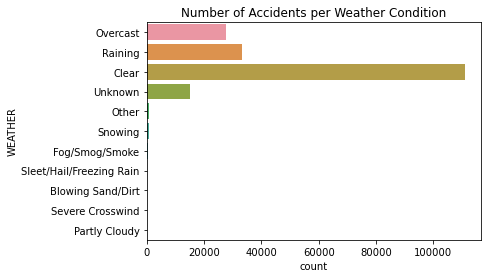

In [32]:
# Observing the Count Plots of WEATHER

sns.countplot(y=df['WEATHER'],data=df)
plt.title('Number of Accidents per Weather Condition')

Text(0.5, 1.0, 'Number of Accidents per Lightening Condition')

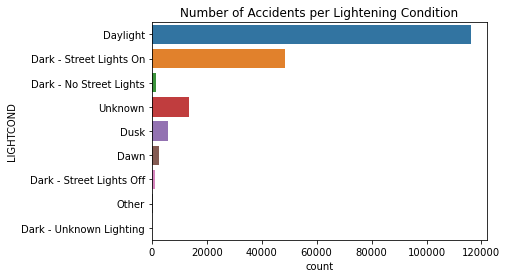

In [31]:
# Observing the Count Plots of LIGHTCOND

sns.countplot(y=df['LIGHTCOND'],data=df)
plt.title('Number of Accidents per Lightening Condition')

Text(0.5, 1.0, 'Number of Accidents per Road Condition')

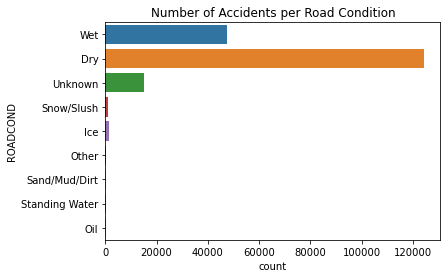

In [33]:
# Observing the Count Plots of ROADCOND

sns.countplot(y=df['ROADCOND'],data=df)
plt.title('Number of Accidents per Road Condition')

Now let's also take a look at the number of people and vehicles involved per accident.

Text(0.5, 1.0, 'Number of Persons per Accident')

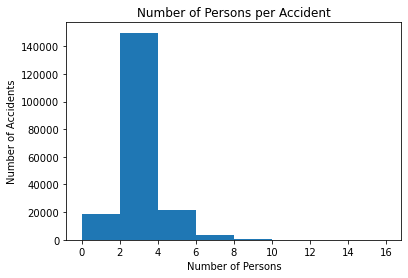

In [30]:
bins = np.arange(df.PERSONCOUNT.min(),17,2)
plt.hist(df.PERSONCOUNT,bins=bins)
plt.xlabel('Number of Persons')
plt.ylabel('Number of Accidents')
plt.title('Number of Persons per Accident')

In [ ]:
bins = np.arange(df.PERSONCOUNT.min(),8,1)
plt.hist(df.VEHCOUNT,bins=bins)
plt.xlabel('Number of Persons')
plt.ylabel('Number of Accidents')
plt.title('Number of Persons per Accident')

## 4. Conclusion

Overall, this analysis provided valuable insights into the causes and consequences of motor vehicle accidents in the Seattle Area. These insights shine light on some areas that may require particular attention from the city's authorities in order to better anticipate and prevent future accidents.

For more information, please check the full report on my Github.

Thank you!

Ilan Gil